In [61]:
%matplotlib inline

## Value iteration 

Value iteration is a method of computing the value of an optimal policy.
The basic algorithm is given below

Let 
1. $S$ be the set of states, 
2. $v$ be the value function. We denote the $i^{th}$ iteration of the value function using $v^i$.
3. $C(s, a)$ denote the contribution function which is a function of the state s and action(decision) a. It returns the reward in state s when the agent takes action a
4. $\gamma$ denote the discount factor $0 < \gamma < 1$



**Step 0. Initialization**:
\begin{align}
        \text{Set }v^0(s) = 0  :      \forall{s} \text{ }\epsilon\text{ }S
\end{align}
\begin{align}
         \text{Fix a tolerance parameter } \epsilon > 0
\end{align}
        

**Step 1. For each ${s} \text{ }\epsilon\text{ }S$:**
\begin{align}
    v^n(s) = max_{a \text{ }\epsilon\text{ }A}(C(s, a) + \gamma \sum_{s^{\prime} \text{ }\epsilon\text{ }S} P(s^{\prime} |s, a)v^{n-1}(s^{\prime}))
\end{align}

**Step 2.**
\begin{align}
   \text{if } || v^{n} - v^{n-1}|| < \epsilon(1 - \gamma)/2\gamma \text{, let } \pi_{\epsilon} \text{ be the resulting policy which solves the equation mentioned at Step 1, and let } v_{\epsilon} = v_{n} \text{ and stop.}
\end{align}
\begin{align}
    \text{else set } n = n + 1 \text{ and go to Step 1}
\end{align}

Please note that we stop the algorithm when $$|| v^{n} - v^{n-1}|| < \epsilon(1 - \gamma)/2\gamma $$
This is when the value function converges

Here $||v||$ is the max-norm defined by $$||v|| = max_{s}|v(s)|$$

**Example**

Consider a 2 stage Markov chain with the following one step transition matrix

\begin{equation*}
    P = \begin{vmatrix}
    0.7 & 0.3 \\
    0.05 & 0.95
    \end{vmatrix}
\end{equation*}

The Contribution from each transition from state $i \text{ } \epsilon \{1, 2\}$ to state $j \text{ } \epsilon \{1, 2\}$ is

\begin{equation*}
C = \begin{vmatrix}
10 & 30 \\
20 & 5
\end{vmatrix}
\end{equation*}

Let us apply the value iteration algorithm for an infinite horizon problem. 
Please note that, for this exercise, we are not choosing a decision so, there won't be any maximisation step.

In [70]:
import matplotlib.pyplot as plt
from collections import defaultdict

class ValueIterationSimulator:
    """
    This class is a simulation of the steps that we do to perform Value iteration.
    """
    def __init__(self, states, C, P, gamma, initial_v):
        """
        States : List(int) = A sequence of states. For e.g. [1, 2]
        
        C : List[List(int)] = The Contribution from each transition within the states. 
                              So, for n states this will n x n matrix
        
        P : List[List(int)] = The transition probablity matrix. 
        
        gamma : int = Discount factor.
        
        initial_v : dict(int, int) = The initial estimate of the value function for each state. 
        
        """
        self.states = states
        self.C = C 
        self.P = P
        self.gamma = gamma 
        self.v = defaultdict(dict)
        # Set the initial estimate of the value function for each state
        for state, init_estimate in initial_v.items():
            self.v[0][state] = init_estimate
    
    def start(self, num_of_iterations=50):
        for i in range(1, num_of_iterations+1):
            for x in self.states:
                expected_contribution = sum(C[x-1])/len(C[x-1])
                expected_values = self.gamma * sum([self.P[x-1][y-1]*self.v[i-1][y] for y in self.states])
                self.v[i][x] = expected_contribution + expected_values
    
    
    def plot_value_function(self, state=1, num_of_values=50):
        X = [x for x in range(0, num_of_values+1)]
        Y = [value[state] for k, value in self.v.items()][0:num_of_values+1]
        plt.plot(X, Y, 'ro')
        plt.show()

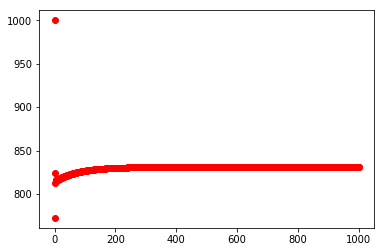

In [75]:
states = [1, 2]
P = [[0,7, 0.3],
     [0.05, 0.95]]
C = [[10, 30],
     [20, 5]]

initial_v = {
    1:0,
    2:1000
}
gamma = 0.8

value_iteration = ValueIterationSimulator(states, C, P, gamma, initial_v)
value_iteration.start(num_of_iterations=1000)
value_iteration.plot_value_function(state=2, num_of_values=1000)